In [167]:
%load_ext autoreload
%autoreload 2

import plots
import runner
import analysis
import processing
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Coupled Networks

Meng et al. setup for the 2 coupled network case:

* network with all-to-all coupling
* noisy-inputs to different neurons belonging to same or different network are uncorrelated
* IF neuron model
* input noise for a neuron is modeled as independent Poisson spike trains, mean rate is equal inside a network
* only inhibitory connections, gamma rhythm produced by ING mechanism
* local and global order parameter to measure synchrony

Observations
* with very weak noise: LFPs of different networks do not synchronize, they oscillate at different frequencies -> $r_{global}$ is small
* if noise increases at a certain point system jumps and global order parameter is significantly higher
* Reduction of noise leads now to increased desynchronization

Meng et al. main finding is that independent noise lead to synchronization across two networks

----

How can we replicate and extend with our current setup?

* two EI networks showing natural activity in gamma frequency band
* gamma produced by PING mechanism
* input noise also as Poisson Group per neuron
* compute local and global order parameter for one run
* parameter exploration with noise strength
* collect results and compare local and global order parameters
* generate plots for specific configurations as visual proof

In [168]:
# overwriting default parameters
params = {
  # synaptic coupling strengths, most important parameters for tuning PING mechanism
 "J_itoi": 20.0,
 "J_etoe": 2.,
 "J_etoi": 10.,
 "J_itoe": 6.,

  # Independent spike trains generated by Poisson Point Process for each target neuron
 "ext_input_type": "poisson",

 # in mV, influence of a pre synaptic spike
 "poisson_strength": .3,

 # 50 Hz rate as in Meng et. al.
 "poisson_rate": 50,
}

model = runner.run(modified_params=params, file_name="meng-replication")

Initializing net ...
initialization time: 0.18311190605163574s
------------------ running network!
runtime: 8.0


In [169]:
if 'model' not in locals() or model is None:
    model = analysis.load_model("meng-replication")

Generate PSD plot ...


(<Figure size 576x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13b7988d0>)

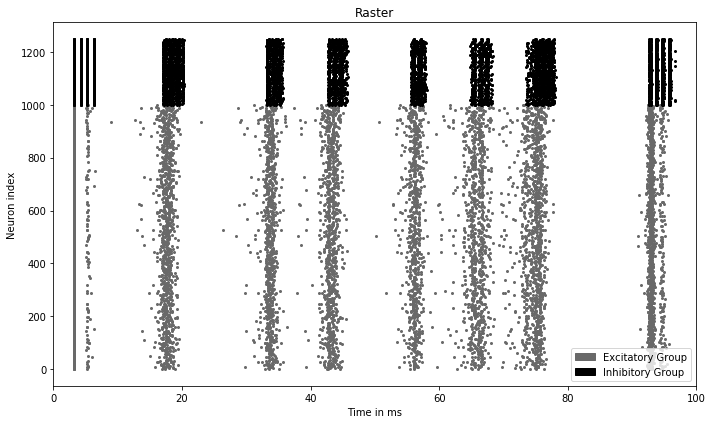

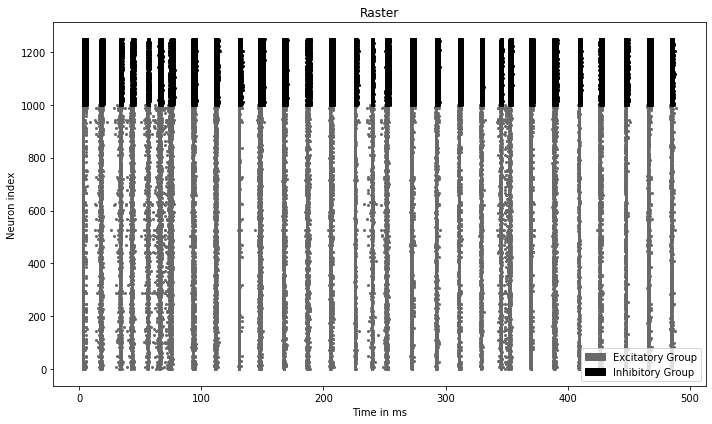

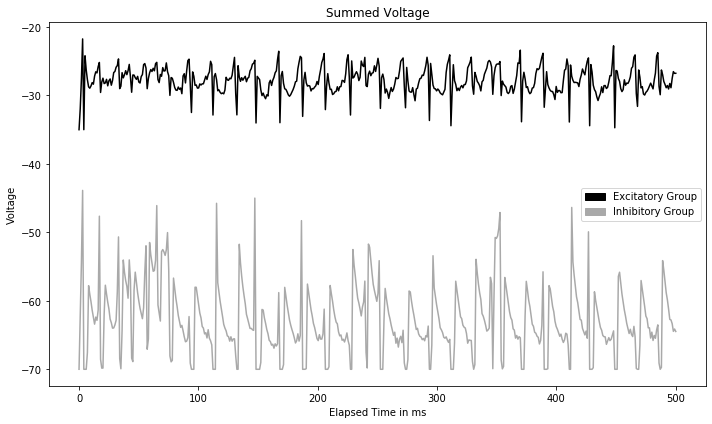

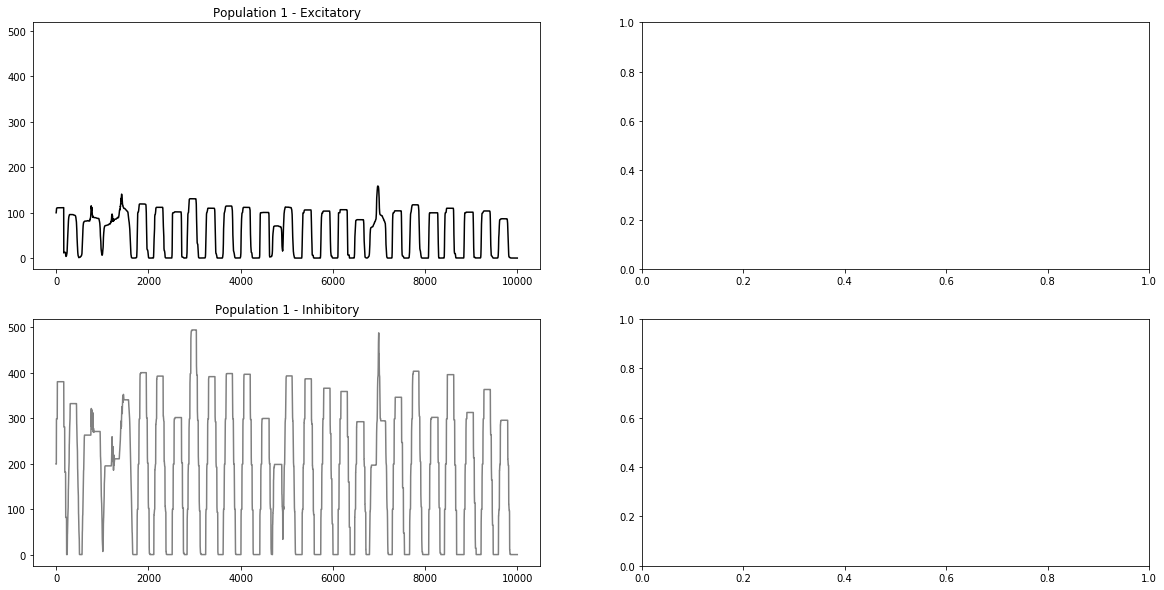

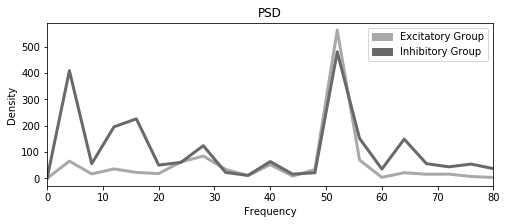

In [170]:
plots.raster(model=model, x_left=0, x_right=100)
plots.raster(model=model)
plots.lfp(model=model)
plots.population_rates(model)
plots.psd(model, title="PSD")

array([3.10097429, 3.20946713, 3.4129806 , 2.93215328, 3.17494397,
       3.1973839 , 3.02597116, 3.41696865, 3.0657536 , 3.26103007])
[177.67273946779224,
 178.22564331862228,
 179.27342984825532,
 177.8666963741,
 177.55785634673086,
 178.1469335252041,
 179.47360193080777,
 175.55887056648635,
 178.57367452879333,
 178.48174219225447]
Local order of 1.768924038837642


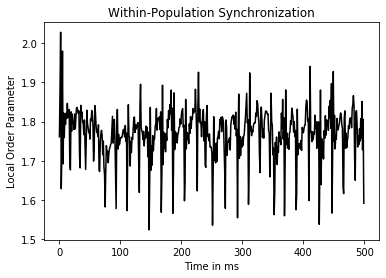

In [171]:
neurons_e = model['model_results']['net']['v_all_neurons_e']
neurons_i = model['model_results']['net']['v_all_neurons_i1']

phases = [processing.phase(neuron) for neuron in neurons_e]
phases.extend([processing.phase(neuron) for neuron in neurons_i])

pprint(phases[0][:10])
pprint([np.degrees(phase)[0] for phase in phases[:10]])

# average of each time step
avg_phase = np.average(phases, axis=0)

plt.title("Within-Population Synchronization")
plt.xlabel("Time in ms")
plt.ylabel("Local Order Parameter")
# plt.ylim(-2, 2)
plt.plot(avg_phase, c="black")

# TODO: we probably cannot simply take average of phase, have to convert it to complex representation and then average it?
print(f"Local order of {np.average(avg_phase)}")

PLV of excitatory group 0.13484429261523273


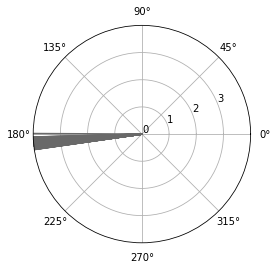

In [172]:
plv = processing.phase_locking_value(neurons_e)
print(f"PLV of excitatory group {plv}")

phases = [processing.phase(neuron) for neuron in neurons_e]

plt.axes(polar=True)
plt.ylim(0, 4)
plt.yticks(np.arange(0, 4 , 1.0))
for angle in phases:
    # TODO: calculate average across time for each neuron!

    # only angle matters, therefore we set constant radius
    plt.plot((0, angle[1]), (0, 4), c="dimgrey")
plt.show()